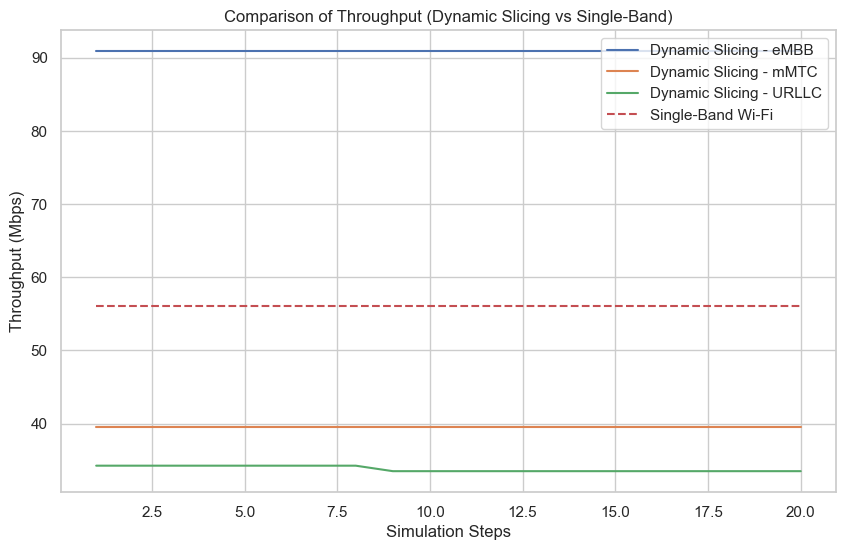

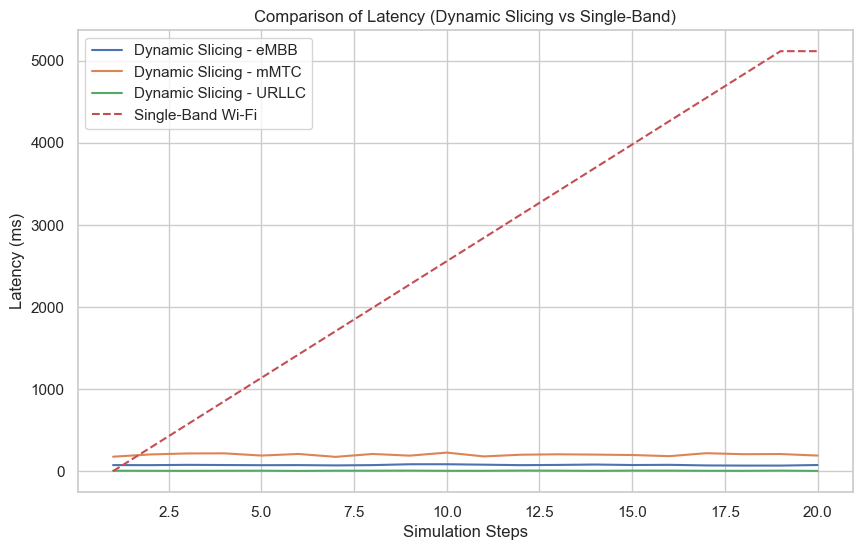

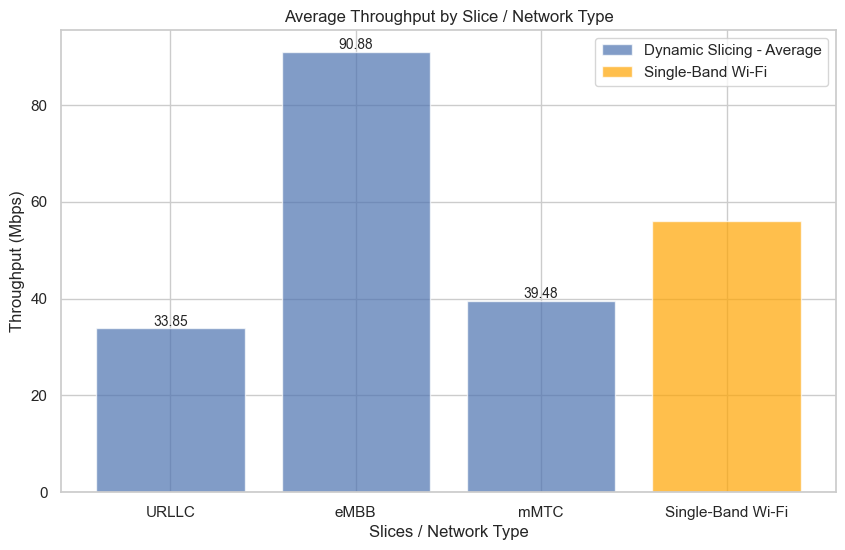

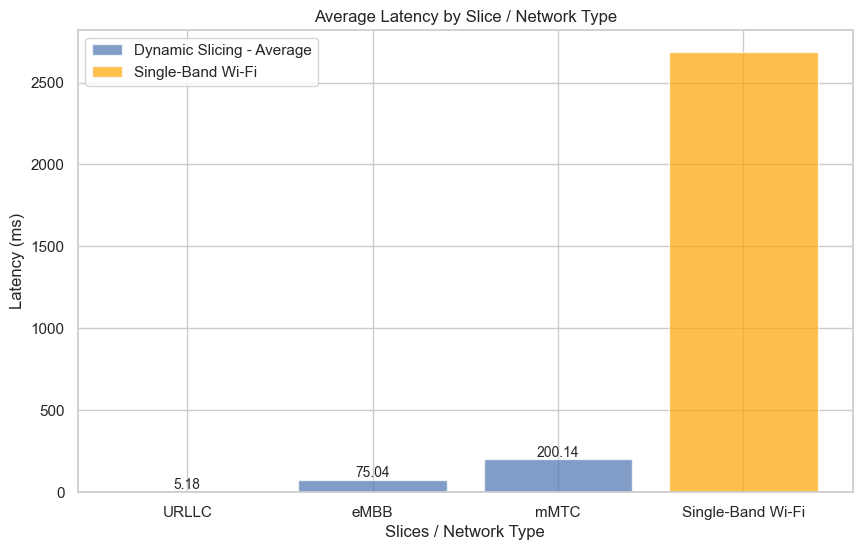

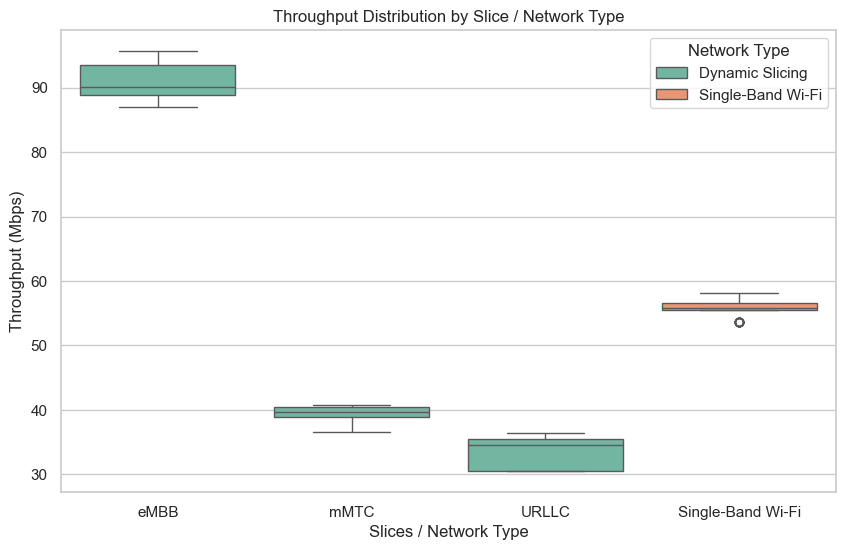

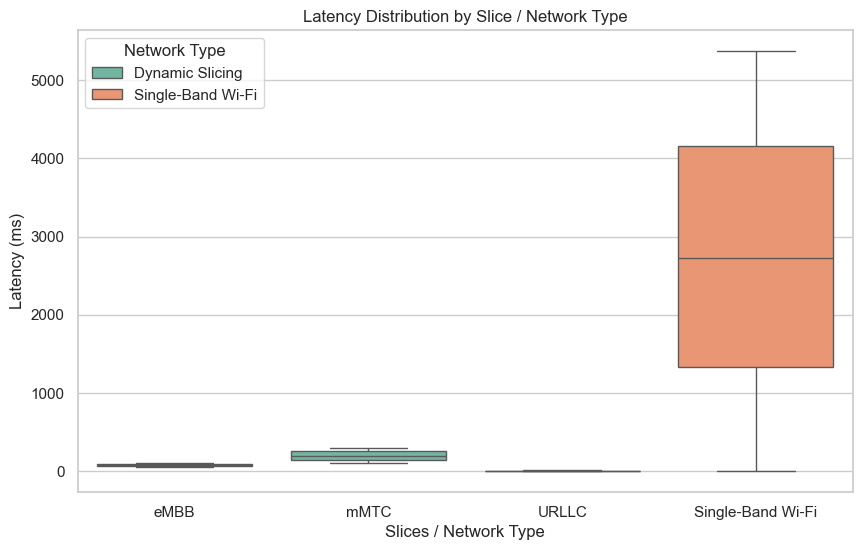

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
rule_based_results = pd.read_csv('rule_based_results_adjusted.csv')
single_band_results = pd.read_csv('single_band_results.csv')

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Function to plot line comparison
def plot_line_comparison(rule_based, single_band, metric, ylabel, title, filename=None):
    plt.figure(figsize=(10, 6))
    
    # Rule-based slicing
    for slice_type in rule_based['Slice'].unique():
        slice_data = rule_based[rule_based['Slice'] == slice_type].groupby('Step')[metric].mean()
        plt.plot(slice_data.index, slice_data.values, label=f"Dynamic Slicing - {slice_type}")

    # Single-band Wi-Fi
    single_band_data = single_band.groupby('Step')[metric].mean()
    plt.plot(single_band_data.index, single_band_data.values, label="Single-Band Wi-Fi", linestyle='--')

    # Plot formatting
    plt.xlabel("Simulation Steps")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    if filename:
        plt.savefig(filename)
    plt.show()

# Function to plot bar comparison
def plot_bar_comparison(rule_based, single_band, metric, ylabel, title, filename=None):
    plt.figure(figsize=(10, 6))

    # Aggregate metrics by slice for rule-based and overall for single-band
    rule_based_avg = rule_based.groupby('Slice')[metric].mean()
    single_band_avg = single_band[metric].mean()

    # Bar chart
    bars = plt.bar(rule_based_avg.index, rule_based_avg.values, label="Dynamic Slicing - Average", alpha=0.7)
    plt.bar(['Single-Band Wi-Fi'], single_band_avg, label="Single-Band Wi-Fi", alpha=0.7, color='orange')

    # Add labels on top of bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
                 ha='center', va='bottom', fontsize=10)
    
    plt.xlabel("Slices / Network Type")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    if filename:
        plt.savefig(filename)
    plt.show()

# Function to plot boxplot comparison
def plot_boxplot_comparison(rule_based, single_band, metric, ylabel, title, filename=None):
    plt.figure(figsize=(10, 6))

    # Combine data for boxplot
    rule_based['Network Type'] = 'Dynamic Slicing'
    single_band['Slice'] = 'Single-Band Wi-Fi'
    single_band['Network Type'] = 'Single-Band Wi-Fi'
    combined = pd.concat([rule_based[['Slice', metric, 'Network Type']], 
                          single_band[['Slice', metric, 'Network Type']]])

    # Boxplot
    sns.boxplot(data=combined, x='Slice', y=metric, hue='Network Type', palette='Set2')
    plt.xlabel("Slices / Network Type")
    plt.ylabel(ylabel)
    plt.title(title)
    if filename:
        plt.savefig(filename)
    plt.show()

# Generate plots
# Line comparison
plot_line_comparison(rule_based_results, single_band_results, 'Throughput', 
                     'Throughput (Mbps)', 'Comparison of Throughput (Dynamic Slicing vs Single-Band)')

plot_line_comparison(rule_based_results, single_band_results, 'Latency', 
                     'Latency (ms)', 'Comparison of Latency (Dynamic Slicing vs Single-Band)')

# Bar comparison
plot_bar_comparison(rule_based_results, single_band_results, 'Throughput', 
                    'Throughput (Mbps)', 'Average Throughput by Slice / Network Type')

plot_bar_comparison(rule_based_results, single_band_results, 'Latency', 
                    'Latency (ms)', 'Average Latency by Slice / Network Type')

# Boxplot comparison
plot_boxplot_comparison(rule_based_results, single_band_results, 'Throughput', 
                        'Throughput (Mbps)', 'Throughput Distribution by Slice / Network Type')

plot_boxplot_comparison(rule_based_results, single_band_results, 'Latency', 
                        'Latency (ms)', 'Latency Distribution by Slice / Network Type')


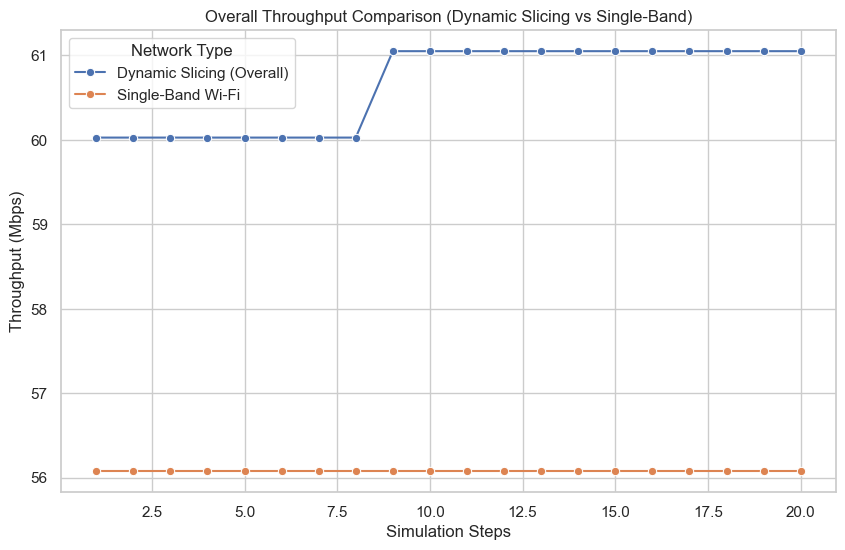

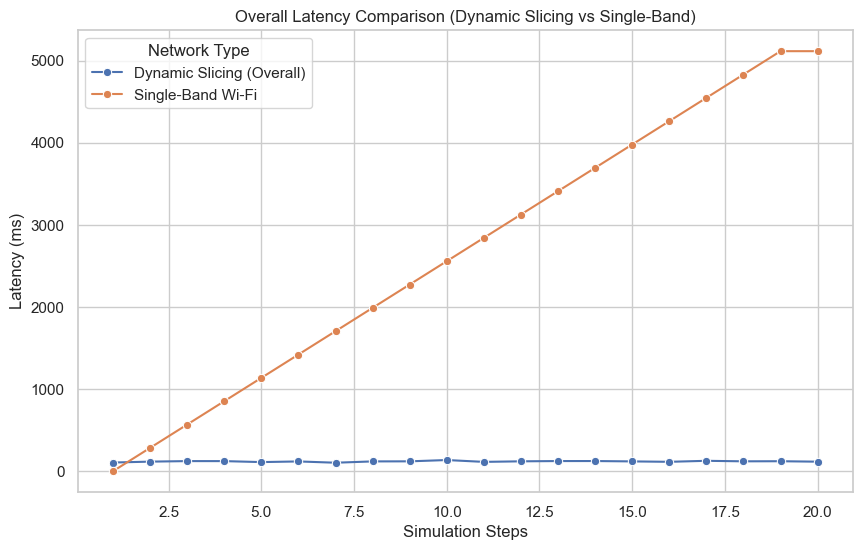

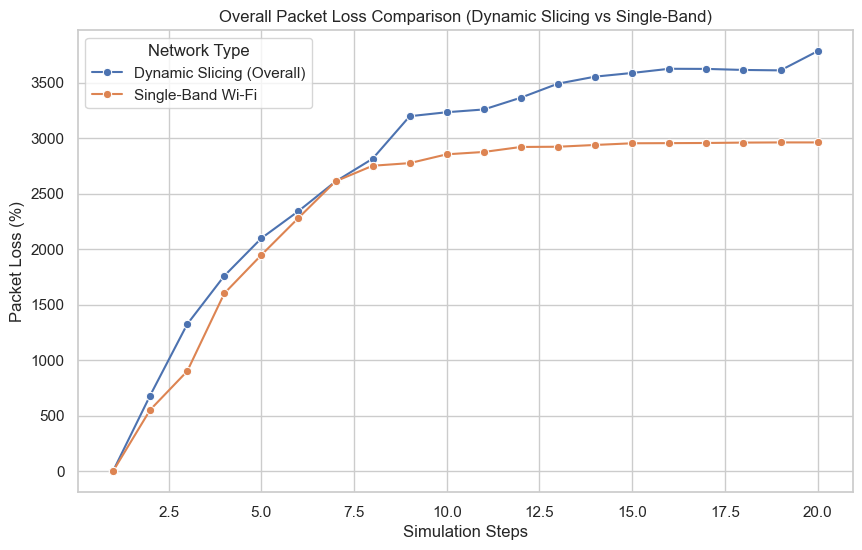

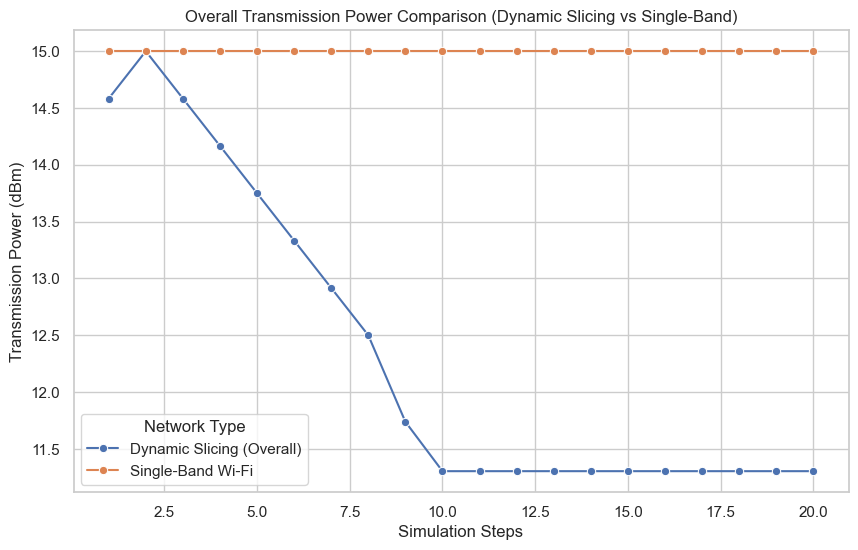

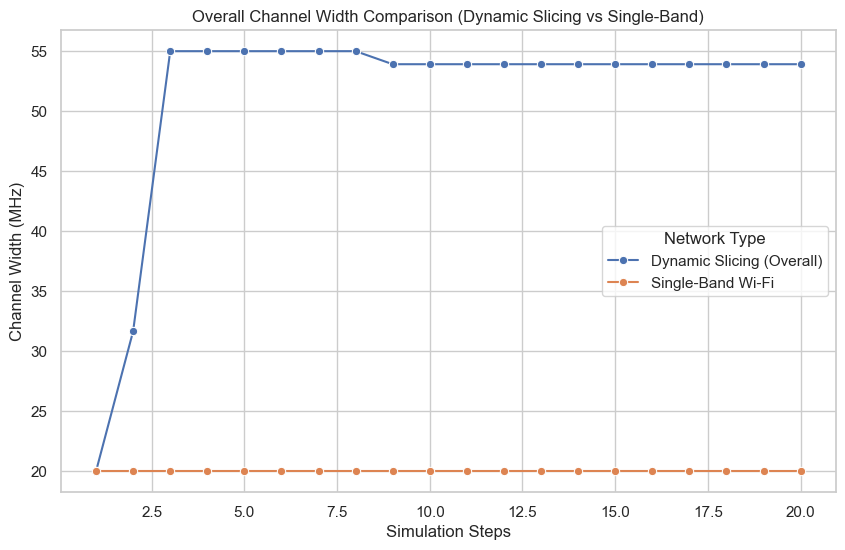

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
# rule_based_results = pd.read_csv('/mnt/data/rule_based_results10.csv')
# single_band_results = pd.read_csv('/mnt/data/single_band_results.csv')

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Function to merge all slices of dynamic slicing into a single dataset for overall comparison
def merge_dynamic_slicing(rule_based):
    # Aggregate metrics across all slices for each step
    merged = rule_based.groupby('Step')[['Throughput', 'Latency', 'PacketLoss', 'txPower', 'channelWidth']].mean().reset_index()
    merged['Network Type'] = 'Dynamic Slicing (Overall)'
    return merged

# Merge dynamic slicing data
dynamic_slicing_overall = merge_dynamic_slicing(rule_based_results)

# Prepare single-band data for comparison
single_band_results['Network Type'] = 'Single-Band Wi-Fi'
single_band_overall = single_band_results.groupby('Step')[['Throughput', 'Latency', 'PacketLoss', 'txPower', 'channelWidth']].mean().reset_index()
single_band_overall['Network Type'] = 'Single-Band Wi-Fi'

# Reset index to prevent issues with duplicate labels
dynamic_slicing_overall.reset_index(drop=True, inplace=True)
single_band_overall.reset_index(drop=True, inplace=True)

# Combine the datasets
overall_comparison = pd.concat([dynamic_slicing_overall, single_band_overall])

# Function to plot merged comparison
def plot_overall_comparison(data, metric, ylabel, title, filename=None):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Step', y=metric, hue='Network Type', marker='o')
    plt.xlabel("Simulation Steps")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Network Type")
    if filename:
        plt.savefig(filename)
    plt.show()

# Plot comparisons for overall metrics
plot_overall_comparison(overall_comparison, 'Throughput', 'Throughput (Mbps)', 
                        'Overall Throughput Comparison (Dynamic Slicing vs Single-Band)')

plot_overall_comparison(overall_comparison, 'Latency', 'Latency (ms)', 
                        'Overall Latency Comparison (Dynamic Slicing vs Single-Band)')

plot_overall_comparison(overall_comparison, 'PacketLoss', 'Packet Loss (%)', 
                        'Overall Packet Loss Comparison (Dynamic Slicing vs Single-Band)')

plot_overall_comparison(overall_comparison, 'txPower', 'Transmission Power (dBm)', 
                        'Overall Transmission Power Comparison (Dynamic Slicing vs Single-Band)')

plot_overall_comparison(overall_comparison, 'channelWidth', 'Channel Width (MHz)', 
                        'Overall Channel Width Comparison (Dynamic Slicing vs Single-Band)')
